In [115]:
# Importing the libraries

import pandas as pd   #data preprocessing
import seaborn as sns  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [116]:
# Vehicle dataset from Cardheko. We are going to predict the price of the car based on the given features
# https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/tasks   -- Dataset link

df = pd.read_csv('car data.csv')

In [117]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [118]:
# Checking the shape of the data

df.shape

(301, 9)

In [119]:
# finding out how many unique values are there in the categorical features

print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [120]:
# Check missing or null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [121]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [122]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [123]:
# Car_Name column is removed, it is not important

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [124]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [125]:
final_dataset['Current_Year'] = 2020

In [126]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [127]:
# To check how many years old the car is. So, adding new feature for that  

final_dataset['no_year'] = final_dataset['Current_Year']-final_dataset['Year']

In [128]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [129]:
# Dropping Year and Current_Year column and putting inplace= True beacuse so that the operation 
# happens inplace like a permanent operation

final_dataset.drop(['Year','Current_Year'], axis = 1, inplace = True)

In [130]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [131]:
# get_dummies is a funt. which help us to convert all the things into one hot encodeing 
# and drop_first is used to drop the first column to escape from the dummy variable trap.

final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [132]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [133]:
# Checking Correlation, How one feature is correlated to other features

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


Pairplot doesn't really give us much information regarding the features so let's plot a heatmap

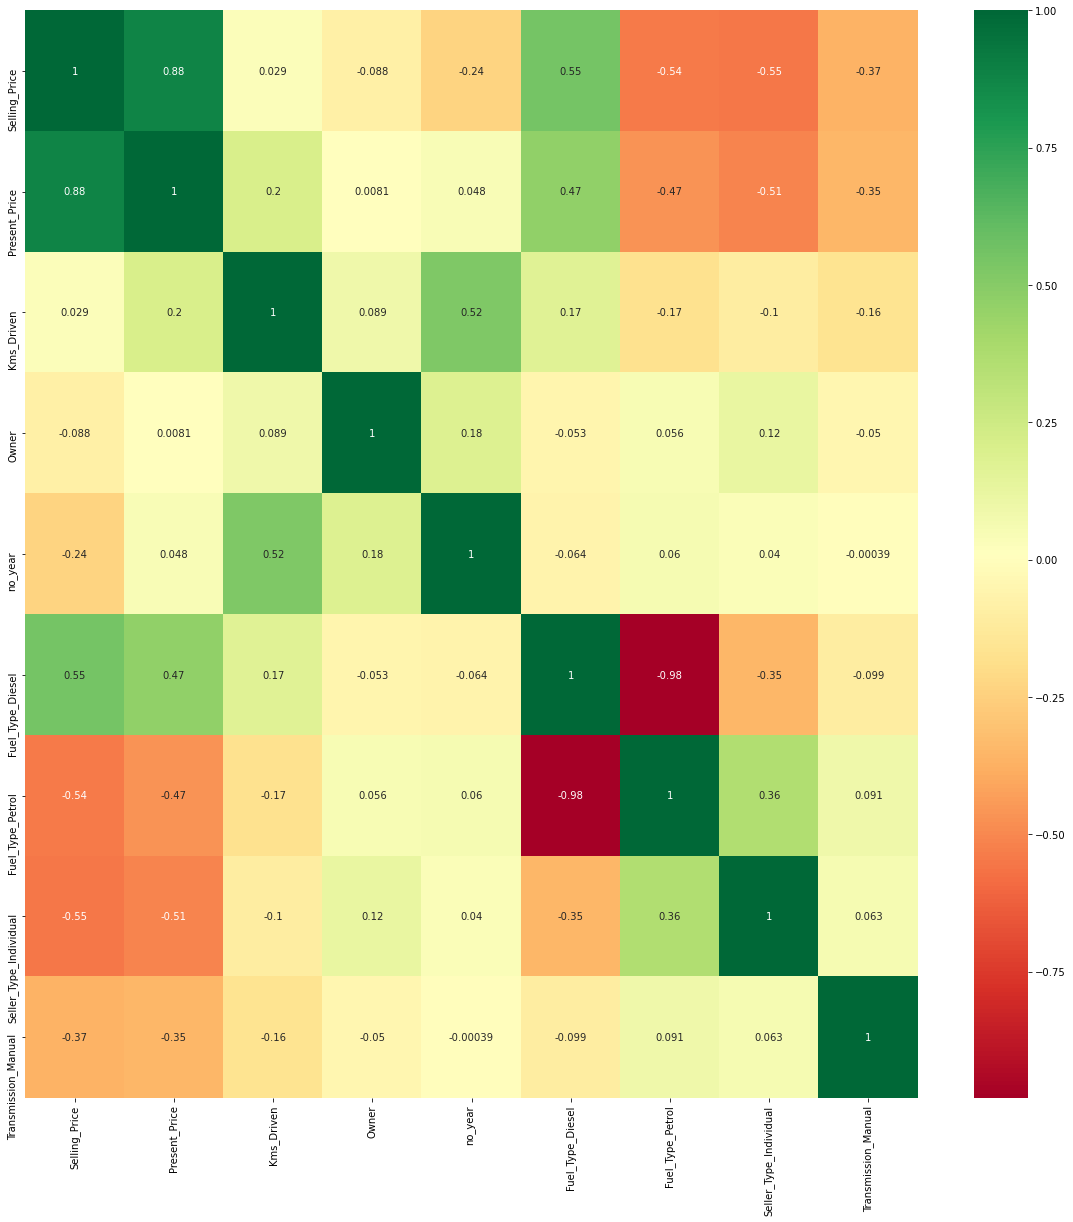

In [134]:
# Get correlations of each features in dataset

corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heatmap 
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn") # annot=True so that we can see the values

In [135]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Determining Independent(X) and Dependent(y) features

In [376]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [377]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [378]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [379]:
# Feature Importance 

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [380]:
print(model.feature_importances_)

[0.37456774 0.03893337 0.00090308 0.07841915 0.22163559 0.01496467
 0.12926562 0.14131078]


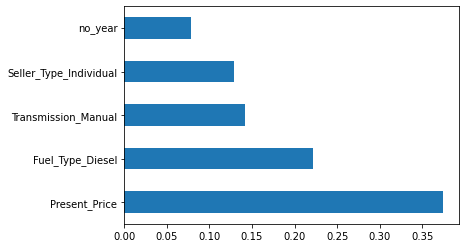

In [381]:
# Plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Spliting Training and Test data

In [390]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=18)

In [391]:
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


### Now I will be trying different different algorithms/models and which algorithm gives me the best accuracy and least errors. I will go ahead and use that algorithm for model building.

## Linear Regression

In [352]:
# Fitting the data in the model
from sklearn.linear_model import LinearRegression  

lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)

LinearRegression()

In [353]:
y_pred = lr_model.predict(X_test)

In [354]:
#Accuracy of training and testing data
print(f'The train score:  {lr_model.score(X_train,y_train)}')
print(f'The test score:   {lr_model.score(X_test,y_test)}')

The train score:  0.8888146851810805
The test score:   0.8438222296666884


### Performance metrics for Linear Regression

In [355]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.229556052041483
MSE: 3.0589734180888675
RMSE: 1.748992114930444


## Random Forest 

In [333]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [334]:
# Train Accuracy

y_pred = rf_random.predict(X_test)
rf_random.score(X_train,y_train)

0.9841279888153016

In [335]:
# Test Accuracy

rf_random.score(X_test,y_test)

0.9711487080197466

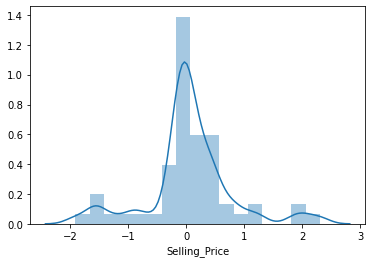

In [336]:
# Gaussian Distribution

sns.distplot(y_test-y_pred)
plt.show()

### Performance metrics for Random Forest

In [337]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.47626229508196766
MSE: 0.565095372131148
RMSE: 0.7517282568396295


## XGBoost Regressor 

In [389]:
from sklearn.ensemble import GradientBoostingRegressor

xgb_reg = GradientBoostingRegressor(random_state=32)
xgb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=32)

In [385]:
y_pred = xgb_reg.predict(X_test)

In [386]:
#Accuracy of training and testing data
print(f'The train score:  {xgb_reg.score(X_train,y_train)}')
print(f'The test score:   {xgb_reg.score(X_test,y_test)}')

The train score:  0.9961054093819718
The test score:   0.9626896383265132


There is a a high variance between train and test accuracy of the model

### Performance metrics for XGBoost Regressor

In [361]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.4375875266734713
MSE: 0.6390243623691565
RMSE: 0.7993899939135819


## Decision Tree 

In [392]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [395]:
y_pred = dt_reg.predict(X_test)

In [396]:
#Accuracy of training and testing data
print(f'The train score:  {dt_reg.score(X_train,y_train)}')
print(f'The test score:   {dt_reg.score(X_test,y_test)}')

The train score:  1.0
The test score:   0.9428110149407116


### Performance metrics for Decision Tree

In [397]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6000000000000001
MSE: 1.1201311475409836
RMSE: 1.0583624840011023
